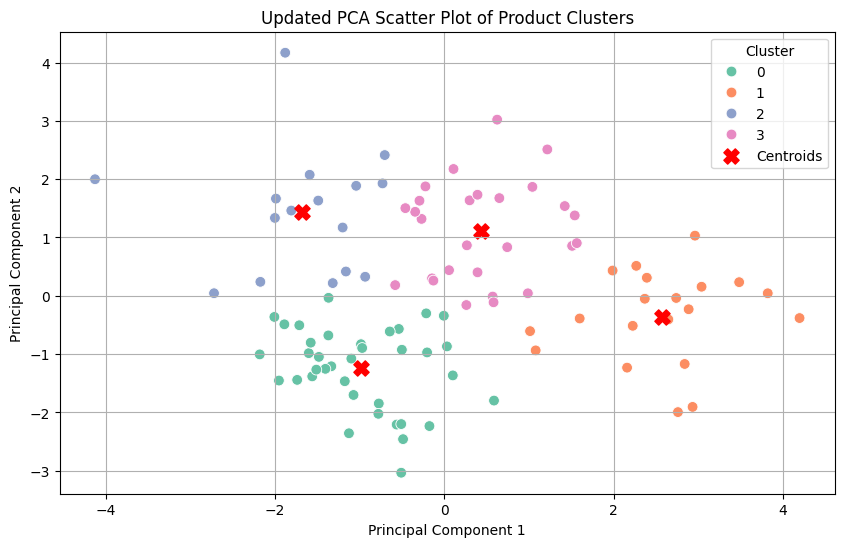

In [6]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the most recently uploaded cleaned and transformed dataset
df = pd.read_csv("../../Data/Transformed/inventory_management_cleaned_transformed.csv", index_col=0)

# Step 1: Ensure Product_UID is present and keep it
if 'Product_UID' not in df.columns and 'Store ID' in df.columns and 'Product ID' in df.columns:
    df['Product_UID'] = df['Store ID'].astype(str) + "_" + df['Product ID'].astype(str)

# Step 2: Aggregate data per Product_UID
agg_df = df.groupby('Product_UID').agg({
    'Price': 'mean',
    'Discount': 'mean',
    'Demand': 'mean',
    'Inventory Level': 'mean',
    'Units Ordered': 'mean',
    'Competitor Pricing': 'mean',
    'Category': 'first',
    'Region': 'first'
}).reset_index()



# Step 4: Extract Product_UID and scale the features
product_ids = agg_df['Product_UID']
features = agg_df.drop(columns=['Product_UID'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Step 6: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 7: Prepare DataFrame for plotting
plot_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
plot_df['Cluster'] = cluster_labels
plot_df['Product_UID'] = product_ids.values

# Step 8: Plot the updated cluster output
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=120, c='red', marker='X', label='Centroids')
plt.title("Updated PCA Scatter Plot of Product Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
